In [3]:
datapath = "<your-data-path>"

# Process the tissue attributes
In this code we load tissue gene attributes by several datafiles. We apply missing values fixing and data scaling with `sklearn.preprocessing.StandardScaler` on the `BIO` and `CCcfs` attributes, while no normalization and fixing on embedding attributes (`EmbN2V_128`). The attributes are all merged in one matrix by the `feature_assemble` function as input for the prediction model building.

In [8]:
import pandas as pd
from help.preprocess.loaders import feature_assemble
import os
label_file = os.path.join(datapath, 'label_Kidney.csv')
features = [{'fname': os.path.join(datapath, 'Kidney_BIO.csv'), 'fixna' : True, 'normalize': 'std'},
            {'fname': os.path.join(datapath, 'Kidney_CCcfs.csv'), 'fixna' : True, 'normalize': 'std'},
            {'fname': os.path.join(datapath, 'Kidney_EmbN2V_128.csv'), 'fixna' : None, 'normalize': None}]
df_X, df_y = feature_assemble(label_file = label_file, 
                              features=features, subsample=False, seed=1, saveflag=False, verbose=True)
pd.merge(df_X, df_y, left_index=True, right_index=True, how='outer')

Loading ../data/label_Kidney.csv
Majority NE 16678 minoriy E 1253
[Kidney_BIO.csv] found 0 Nan...
[Kidney_BIO.csv] Normalization with std ...
[Kidney_CCcfs.csv] found 0 Nan...
[Kidney_CCcfs.csv] Normalization with std ...
[Kidney_EmbN2V_128.csv] No normalization...
17236 labeled genes over a total of 17931
(17236, 3459) data input


,Gene length,Transcripts count,GC content,GTEX_kidney,Gene-Disease association,OncoDB_expression,HPA_kidney,GO-MF,GO-BP,GO-CC,...,Node2Vec_119,Node2Vec_120,Node2Vec_121,Node2Vec_122,Node2Vec_123,Node2Vec_124,Node2Vec_125,Node2Vec_126,Node2Vec_127,label
A1BG,0.003351,0.020942,0.501832,2.044542e-05,0.002950,0.651992,0.000002,0.084365,0.038663,0.115385,...,0.120922,-0.352630,0.580697,-0.659300,-1.320486,1.019308,-0.469064,0.123211,0.557266,NE
A1CF,0.034865,0.047120,0.160530,1.980884e-05,0.021528,0.556939,0.000232,0.069767,0.041026,0.096154,...,-1.162494,0.155702,-1.162071,0.534082,0.798872,0.149595,-0.360515,-1.060540,-0.408493,NE
A2M,0.019624,0.062827,0.176932,3.377232e-03,0.073746,0.584540,0.005382,0.302326,0.056410,0.076923,...,0.150766,1.492019,0.209449,-1.034729,-0.064318,0.029690,0.138344,0.806095,-0.496128,NE
A2ML1,0.026017,0.041885,0.299948,5.123403e-07,0.017699,0.653681,0.000000,0.069767,0.005128,0.038462,...,0.191344,-0.542462,0.746510,0.082089,-1.109212,0.406936,-1.332319,-0.363864,0.443284,NE
A3GALT2,0.005784,0.000000,0.473739,1.421472e-06,0.018692,0.663540,0.000000,0.069767,0.015385,0.057692,...,0.483003,-0.197605,0.164332,0.040729,-0.552362,0.242761,0.223486,0.017539,-0.526580,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.021209,0.010471,0.288257,7.073108e-06,0.019355,0.634761,0.000055,0.059024,0.029878,0.000000,...,-0.717935,-0.072597,0.585837,0.172081,-0.278010,0.170799,0.267462,-0.211294,-0.940943,NE
ZYG11B,0.040775,0.005236,0.248648,7.271294e-05,0.016435,0.646090,0.000238,0.000000,0.005128,0.000000,...,0.372134,0.007040,-0.278071,-1.309595,-0.352476,0.732887,0.156505,0.516706,-0.412953,NE
ZYX,0.003958,0.047120,0.539522,8.282866e-04,0.022104,0.672638,0.000177,0.046512,0.035897,0.153846,...,-0.316321,-0.382132,0.400354,0.322564,0.400369,0.188850,0.593201,-0.093008,-0.508902,NE
ZZEF1,0.056017,0.052356,0.304484,9.626291e-05,0.044248,0.657491,0.000121,0.093023,0.010256,0.000000,...,-0.520060,-0.000595,-0.101278,-0.468345,0.240905,-0.124018,0.568793,-0.422793,-0.701705,NE


# Prediction
We process k-fold cross validation of a LightGBM classifier (`n_splits=5`), and then storing predictions and printing metrics.

{'E': 0, 'NE': 1}
label
NE       15994
E         1242
Name: count, dtype: int64


5-fold: 100%|██████████| 5/5 [00:33<00:00,  6.77s/it]


,measure
ROC-AUC,0.0434±0.0055
Accuracy,0.9476±0.0026
BA,0.8344±0.0085
Sensitivity,0.7021±0.0173
Specificity,0.9667±0.0027
MCC,0.6321±0.0152
CM,"[[872, 370], [533, 15461]]"


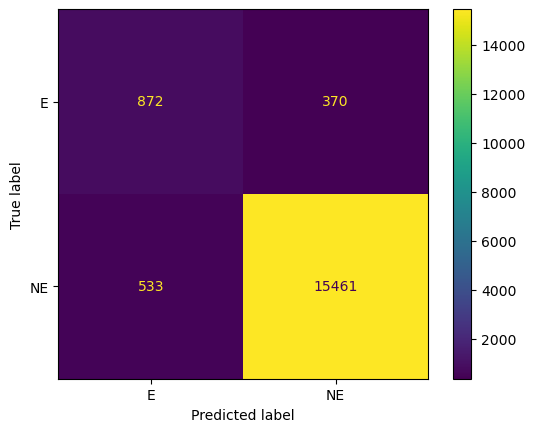

In [9]:
from help.models.prediction import predict_cv
predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, outfile='pred_Kidney.csv') 

# Prediction with undersampling
Due to the strong unbalancing between the two classes, we can redo prediction model building by undersampling the majority class: this is done by re-applying the `feature_assemble` function with parameter `subsample=True`: this flag set causes the majority class to be downsampled to 4 times the dimension of the minority class. The we re-apply the k-fold cross validation of the a LightGBM classifier.

Loading ../data/label_Kidney.csv
Majority NE 16678 minoriy E 1253
[Kidney_BIO.csv] found 0 Nan...
[Kidney_BIO.csv] Normalization with std ...
[Kidney_CCcfs.csv] found 0 Nan...
[Kidney_CCcfs.csv] Normalization with std ...
[Kidney_EmbN2V_128.csv] No normalization...
6043 labeled genes over a total of 6265
(6043, 3459) data input
{'E': 0, 'NE': 1}
label
NE       4801
E        1242
Name: count, dtype: int64


5-fold: 100%|██████████| 5/5 [00:18<00:00,  3.79s/it]


,measure
ROC-AUC,0.0466±0.0032
Accuracy,0.9136±0.0097
BA,0.8689±0.0213
Sensitivity,0.7930±0.0425
Specificity,0.9448±0.0060
MCC,0.7361±0.0329
CM,"[[985, 257], [265, 4536]]"


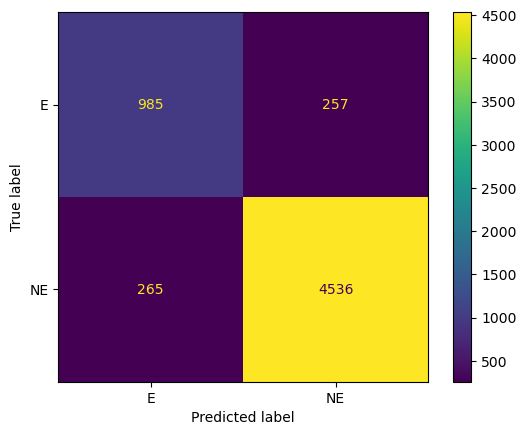

In [10]:
df_X, df_y = feature_assemble(label_file = label_file, 
                              features=features, subsample=True, seed=1, verbose=True)
predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, outfile='pred_Kidney.csv') 